In [28]:
import vae_HYP
import geoopt
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import poincareball

In [29]:
transform = transforms.Compose([
        transforms.ToTensor(),
        #transforms.Normalize((0.1307,), (0.3081,))
        ])

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET',
                              download=True, train=True, transform=transform)
testset = datasets.MNIST('PATH_TO_STORE_TESTSET',
                            download=True, train=False, transform=transform)

size = len(trainset)
print(size)

#Splitting training set into training and validation data
train_data, val_data = torch.utils.data.random_split(trainset, [int(size-size*0.2), int(size*0.2)])

trainloader = torch.utils.data.DataLoader(train_data, batch_size=256, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=256)
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=True)


60000


In [30]:
model = vae_HYP.VariationalAutoencoder(latent_dims=100)

In [31]:
learning_rate = 1e-3

In [32]:
optim = geoopt.optim.RiemannianAdam(model.parameters(), lr=learning_rate)

In [33]:
### Training function
def train_epoch(vae, dataloader, optimizer):
    # Set train mode for both the encoder and the decoder
    vae.train()
    train_loss = 0.0
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for x, _ in dataloader: 
        # Move tensor to the proper device
        # x = x.to(device)
        x_hat = vae(x)
        # Evaluate loss
        #ball = poincareball.PoincareBall()
        loss = ((x - x_hat)**2).sum() + (vae.encoder.kl)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print batch loss
        print('\t partial train loss (single batch): %f' % (loss.item()))
        train_loss+=loss.item()

    return train_loss / len(dataloader.dataset)

In [34]:
### Testing function
def test_epoch(vae, dataloader):
    # Set evaluation mode for encoder and decoder
    vae.eval()
    val_loss = 0.0
    with torch.no_grad(): # No need to track the gradients
        for x, _ in dataloader:
            # Move tensor to the proper device
            # x = x.to(device)
            # Encode data
            encoded_data = vae.encoder(x)
            # Decode data
            x_hat = vae(x)
            loss = ((x - x_hat)**2).sum() + vae.encoder.kl
            val_loss += loss.item()

    return val_loss / len(dataloader.dataset)

In [35]:
def plot_ae_outputs(encoder,decoder,n):
    plt.figure(figsize=(10,4.5))
    for i in range(n):
      ax = plt.subplot(2,n,i+1)
      img = testset[i][0].unsqueeze(0)
      encoder.eval()
      decoder.eval()
      with torch.no_grad():
         rec_img  = decoder(encoder(img))
      plt.imshow(img.squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
        ax.set_title('Original images')
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
         ax.set_title('Reconstructed images')
    plt.show()   

	 partial train loss (single batch): 61529.804688
	 partial train loss (single batch): 59724.210938
	 partial train loss (single batch): 58359.035156
	 partial train loss (single batch): 57089.695312
	 partial train loss (single batch): 55451.351562
	 partial train loss (single batch): 53737.523438
	 partial train loss (single batch): 51815.734375
	 partial train loss (single batch): 49879.460938
	 partial train loss (single batch): 47768.101562
	 partial train loss (single batch): 45604.066406
	 partial train loss (single batch): 43623.878906
	 partial train loss (single batch): 42401.652344
	 partial train loss (single batch): 41073.875000
	 partial train loss (single batch): 40214.617188
	 partial train loss (single batch): 39333.171875
	 partial train loss (single batch): 38918.214844
	 partial train loss (single batch): 38433.828125
	 partial train loss (single batch): 37926.808594
	 partial train loss (single batch): 37738.023438
	 partial train loss (single batch): 37480.625000


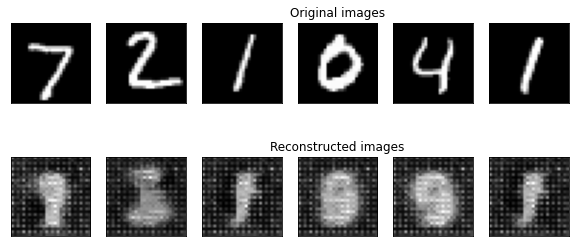

	 partial train loss (single batch): 23104.169922
	 partial train loss (single batch): 22970.328125
	 partial train loss (single batch): 23177.732422
	 partial train loss (single batch): 22781.505859
	 partial train loss (single batch): 22857.320312
	 partial train loss (single batch): 22836.849609
	 partial train loss (single batch): 23116.281250
	 partial train loss (single batch): 22809.199219
	 partial train loss (single batch): 22848.388672
	 partial train loss (single batch): 22889.722656
	 partial train loss (single batch): 22857.585938
	 partial train loss (single batch): 23318.037109
	 partial train loss (single batch): 23196.007812
	 partial train loss (single batch): 22464.277344
	 partial train loss (single batch): 22783.437500
	 partial train loss (single batch): 22565.814453
	 partial train loss (single batch): 22614.699219
	 partial train loss (single batch): 22817.285156
	 partial train loss (single batch): 22525.648438
	 partial train loss (single batch): 22416.796875


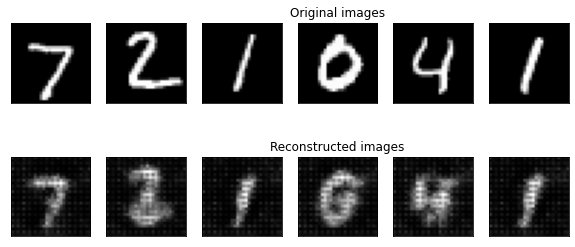

	 partial train loss (single batch): 19604.578125
	 partial train loss (single batch): 19606.664062
	 partial train loss (single batch): 19468.109375
	 partial train loss (single batch): 19572.554688
	 partial train loss (single batch): 19330.414062
	 partial train loss (single batch): 19416.302734
	 partial train loss (single batch): 19413.791016
	 partial train loss (single batch): 19366.757812
	 partial train loss (single batch): 19050.453125
	 partial train loss (single batch): 19279.292969
	 partial train loss (single batch): 19608.041016
	 partial train loss (single batch): 19368.960938
	 partial train loss (single batch): 19517.671875
	 partial train loss (single batch): 19100.816406
	 partial train loss (single batch): 19252.464844
	 partial train loss (single batch): 19072.759766
	 partial train loss (single batch): 19011.091797
	 partial train loss (single batch): 19164.347656
	 partial train loss (single batch): 19412.148438
	 partial train loss (single batch): 18984.630859


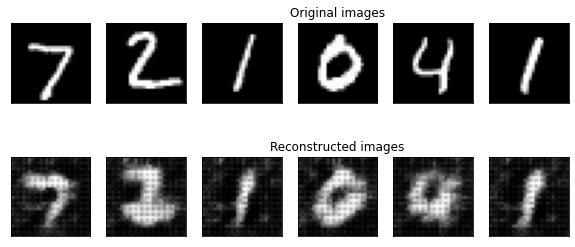

	 partial train loss (single batch): 16938.914062
	 partial train loss (single batch): 18328.824219
	 partial train loss (single batch): 17292.871094
	 partial train loss (single batch): 18353.925781
	 partial train loss (single batch): 17781.287109
	 partial train loss (single batch): 17341.658203
	 partial train loss (single batch): 17819.488281
	 partial train loss (single batch): 17154.458984
	 partial train loss (single batch): 17576.886719
	 partial train loss (single batch): 17423.751953
	 partial train loss (single batch): 17315.681641
	 partial train loss (single batch): 17019.433594
	 partial train loss (single batch): 17621.796875
	 partial train loss (single batch): 17396.750000
	 partial train loss (single batch): 17329.867188
	 partial train loss (single batch): 17340.511719
	 partial train loss (single batch): 16934.529297
	 partial train loss (single batch): 17159.488281
	 partial train loss (single batch): 17101.000000
	 partial train loss (single batch): 16894.683594


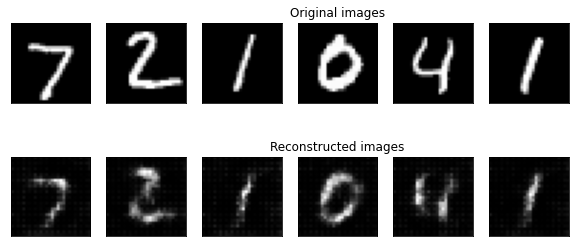

	 partial train loss (single batch): 16033.119141
	 partial train loss (single batch): 16385.683594
	 partial train loss (single batch): 16440.337891
	 partial train loss (single batch): 16718.660156
	 partial train loss (single batch): 16275.385742
	 partial train loss (single batch): 16379.130859
	 partial train loss (single batch): 16073.359375
	 partial train loss (single batch): 16464.886719
	 partial train loss (single batch): 15875.488281
	 partial train loss (single batch): 16307.160156
	 partial train loss (single batch): 16483.511719
	 partial train loss (single batch): 16455.132812
	 partial train loss (single batch): 16116.732422
	 partial train loss (single batch): 16314.350586
	 partial train loss (single batch): 15863.544922
	 partial train loss (single batch): 16129.241211
	 partial train loss (single batch): 16259.308594
	 partial train loss (single batch): 16353.390625
	 partial train loss (single batch): 16163.324219
	 partial train loss (single batch): 16051.970703


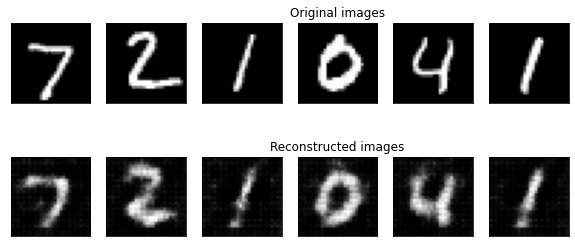

	 partial train loss (single batch): 15595.689453
	 partial train loss (single batch): 15786.380859
	 partial train loss (single batch): 15478.294922
	 partial train loss (single batch): 15565.130859
	 partial train loss (single batch): 15709.437500
	 partial train loss (single batch): 15819.863281
	 partial train loss (single batch): 15874.064453
	 partial train loss (single batch): 15784.038086
	 partial train loss (single batch): 15776.825195
	 partial train loss (single batch): 15721.690430
	 partial train loss (single batch): 15467.939453
	 partial train loss (single batch): 15914.874023
	 partial train loss (single batch): 15566.361328
	 partial train loss (single batch): 15795.329102
	 partial train loss (single batch): 15634.162109
	 partial train loss (single batch): 15491.265625
	 partial train loss (single batch): 15419.904297
	 partial train loss (single batch): 15492.617188
	 partial train loss (single batch): 15640.678711
	 partial train loss (single batch): 15534.964844


KeyboardInterrupt: 

In [36]:
num_epochs = 10

for epoch in range(num_epochs):
   train_loss = train_epoch(model, trainloader,optim)
   val_loss = test_epoch(model, valloader)
   print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, num_epochs,train_loss,val_loss))
   plot_ae_outputs(model.encoder, model.decoder,n=6)


